In [36]:
import pandas as  pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')


## Step 1

### Importing data

In [37]:
df = pd.read_csv('delivery_time.csv')

In [38]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Step 2

In [39]:
df1 = df.rename({'Delivery Time' : 'Delivery_Time', 'Sorting Time': 'Sorting_Time'},axis = 1)

In [40]:
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [42]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [43]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [44]:
df[df.duplicated()].shape

(0, 2)

## Step 3

### Plotting the data to check for outliers

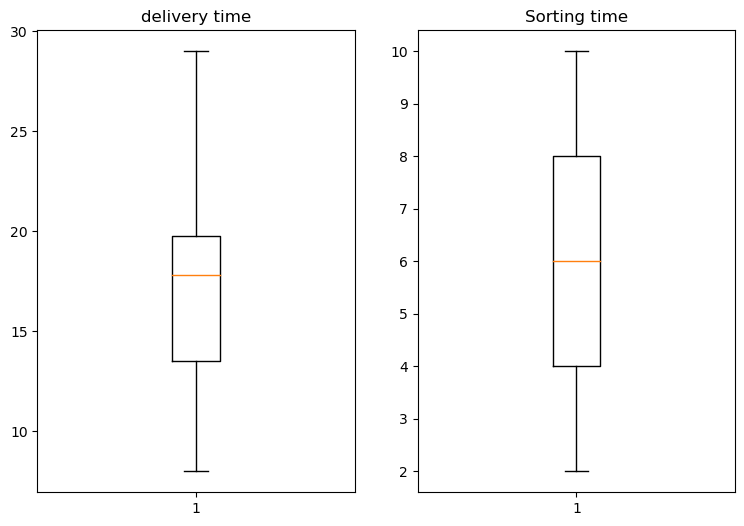

In [45]:
plt.subplots(figsize =(9,6))
plt.subplot(121)
plt.boxplot(df['Delivery Time'])
plt.title('delivery time')

plt.subplot(122)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting time')

plt.show()


##  <font color = 'blue'>There is no Outliers in the Data

## Step 4

### Checking the Correlation between variables

In [46]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


### Visualization of Correlation 

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

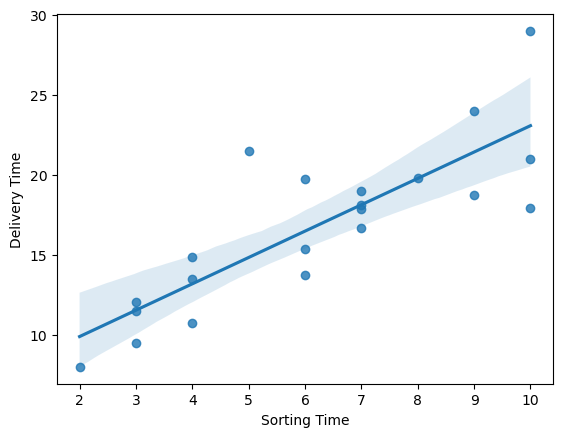

In [47]:
sns.regplot(x=df['Sorting Time'], y =df['Delivery Time'])

## As from the above visualization there is a good correlation  between the Delivery Time and Sorting Time

## Step 5

### Checking for Homoscedasticity or Hetroscedasticity 

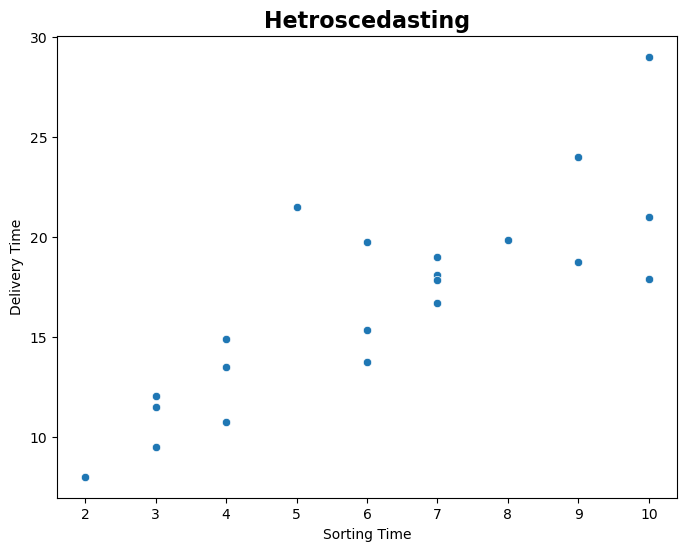

In [48]:
plt.figure(figsize =(8,6))
sns.scatterplot(x = df['Sorting Time'],y = df['Delivery Time'])
plt.title('Hetroscedasting', fontweight = 'bold', fontsize  = 16)
plt.show()
            

In [49]:
df.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

<Axes: xlabel='Delivery Time', ylabel='Sorting Time'>

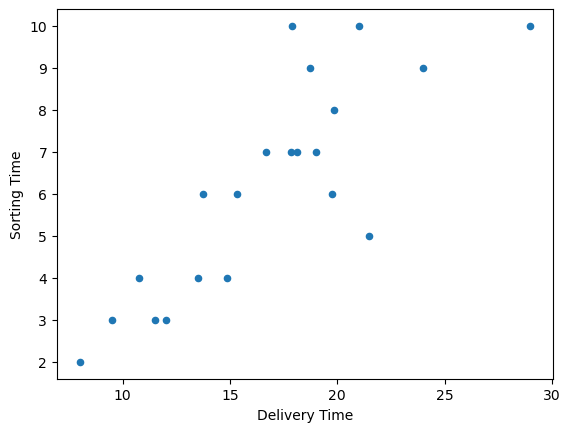

In [50]:
df.plot('Delivery Time', 'Sorting Time' , kind = 'scatter')

###  From the above sactter plot we can conclude that when the sorting time increases  then the delivery time aslo increases with much variation along the way

## Step 6

### Feature Engineering
### Trying different transformation of data to estimate normal distribution and to remove any skewness

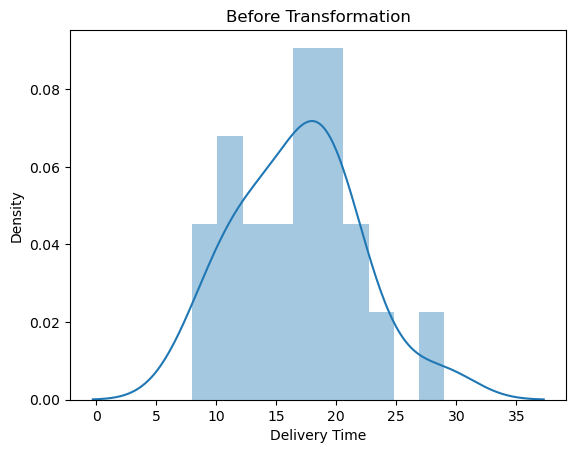

In [51]:
sns.distplot(df['Delivery Time'],bins = 10,kde = True)
plt.title('Before Transformation')
plt.show()

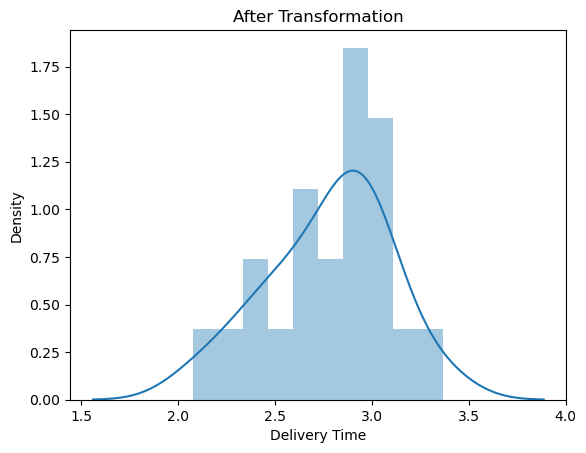

In [52]:
sns.distplot(np.log(df['Delivery Time']), bins = 10, kde = True)
plt.title('After Transformation')

plt.show()

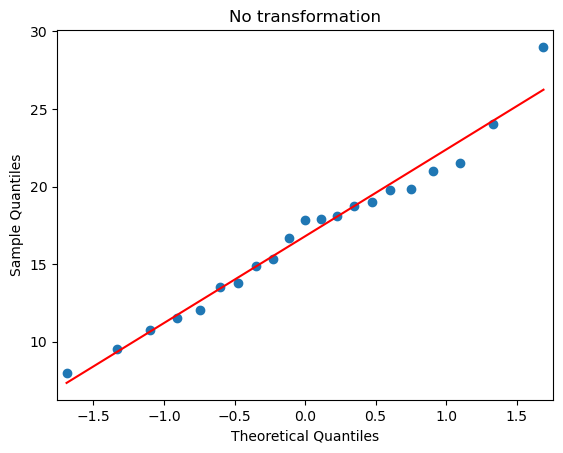

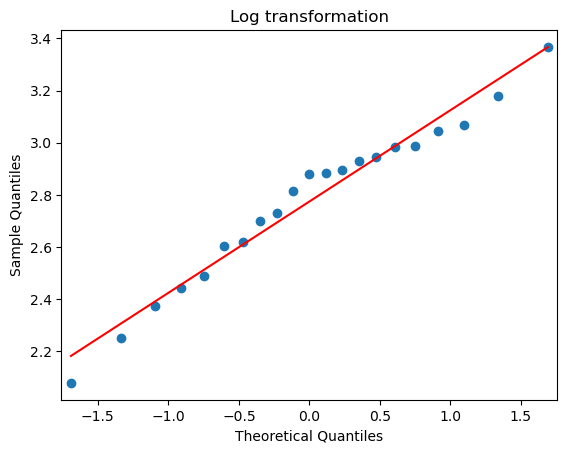

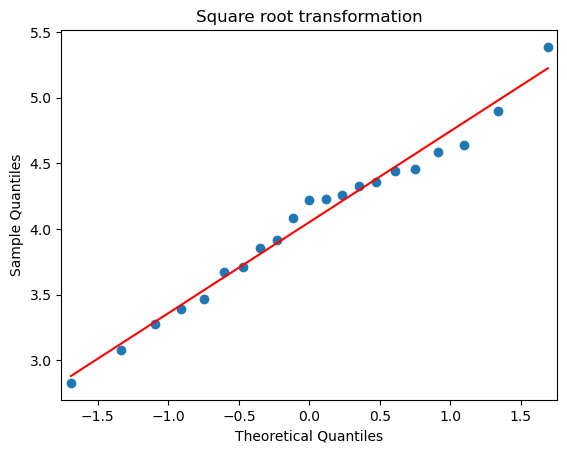

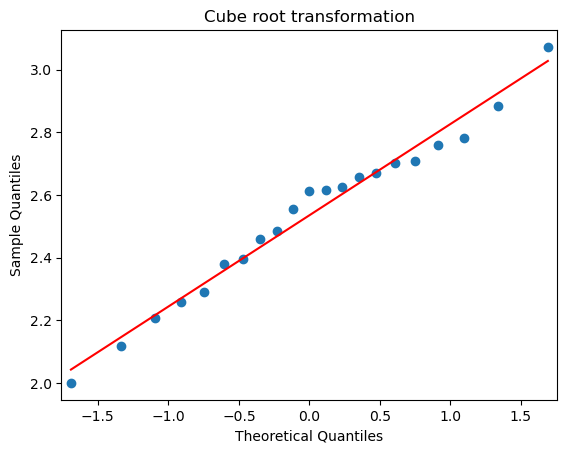

In [53]:
smf.qqplot(df['Delivery Time'], line = 'r')
plt.title('No transformation')

smf.qqplot(np.log(df['Delivery Time']),line = 'r')
plt.title('Log transformation')

smf.qqplot(np.sqrt(df['Delivery Time']), line = 'r')
plt.title('Square root transformation')

smf.qqplot(np.cbrt(df['Delivery Time']) , line = 'r')
plt.title('Cube root transformation')
plt.show()



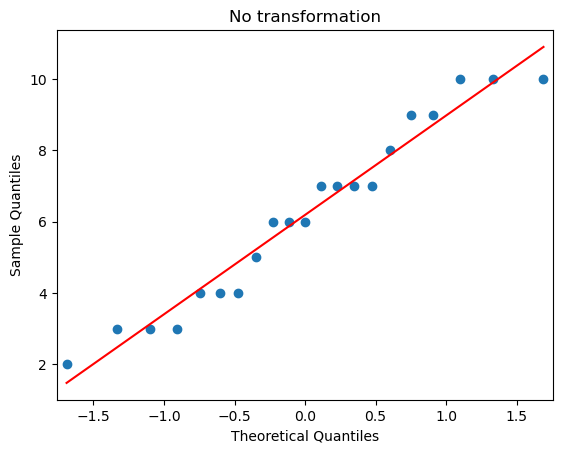

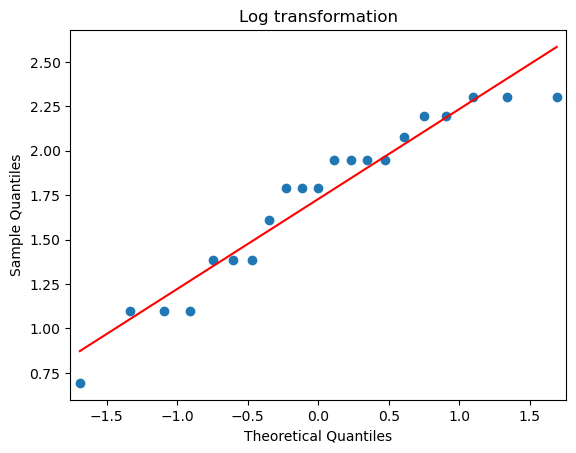

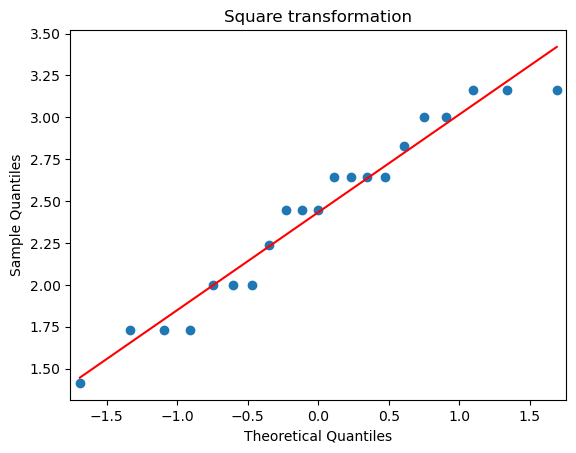

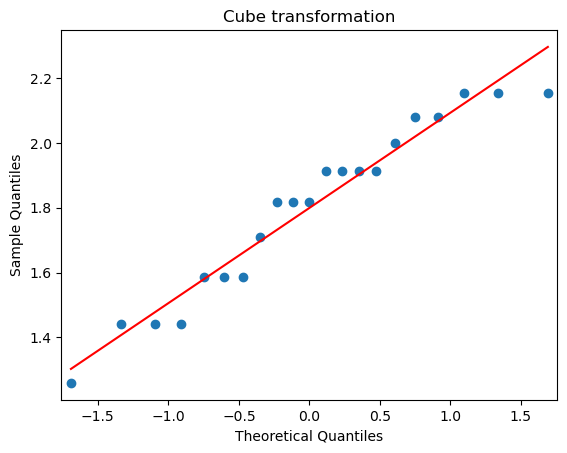

In [54]:
smf.qqplot(df['Sorting Time'], line = 'r')
plt.title('No transformation')

smf.qqplot(np.log(df['Sorting Time']), line = 'r')
plt.title('Log transformation')

smf.qqplot(np.sqrt(df['Sorting Time']), line = 'r')
plt.title('Square transformation')

smf.qqplot(np.cbrt(df['Sorting Time']), line= 'r')
plt.title('Cube transformation')

plt.show()

## Step 7 

### Fitting a Linear Regresssion Model

In [55]:
model = sm.ols('Delivery_Time~Sorting_Time', data= df1).fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        16:59:10   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Square transfromation on Data

In [57]:
model1 = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = df1).fit()

In [58]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Thu, 05 Oct 2023   Prob (F-statistic):           8.48e-07
Time:                            16:59:10   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Log Transformation on data

In [59]:
model2 = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df1).fit()

In [60]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 05 Oct 2023   Prob (F-statistic):           1.60e-07
Time:                           16:59:12   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the above model we can conlude that while doing Log transformation the R-squared and Adj.R-sqaured is improved from the other previous model 

## Step 8

### Residual Analysis
### Test for Normality of Residuals (Q-Q Plot)

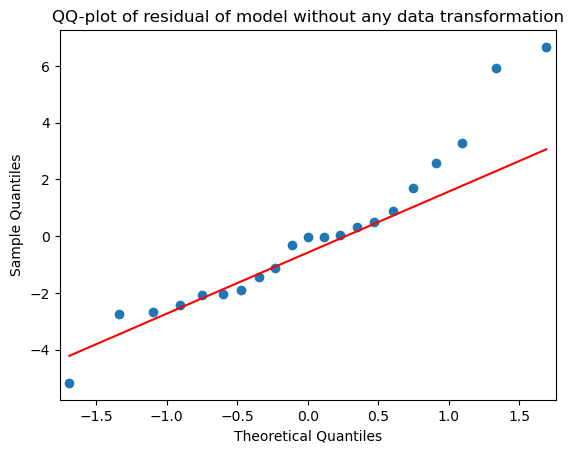

In [61]:
import statsmodels.api as sm
sm.qqplot(model.resid,line = 'q')
plt.title('QQ-plot of residual of model without any data transformation')
plt.show()

sm.qqplot(model3.resid, line =  'q')
plt.title('QQ-plot of residuals of Model with Log transformation')
plt.show()

### we can conclude from above visualization  that the after the log transformation the model3 follows the normal distribution with less skewness than model 

## Step 9 

## Model Validation 

### Comaparing diffrent models with respect to their Root Mean Squared Errors

In [62]:
from sklearn.metrics import mean_squared_error

In [64]:
model_pred_y = np.square(model.predict(df1['Sorting_Time']))
model1_pred_y = pow(model1.predict(df1['Sorting_Time']),3)
model2_pred_y = np.exp(model2.predict(df1['Sorting_Time']))

In [82]:
model_rmse = np.sqrt(mean_squared_error(df1['Delivery_Time'],model_pred_y))
model1_rmse = np.sqrt(mean_squared_error(df1['Delivery_Time'],model1_pred_y))
model2_rmse = np.sqrt(mean_squared_error(df1['Delivery_Time'],model2_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n'  'model1=' , model1_rmse,'\n' 'model2=' , model2_rmse)

model= 2.9349037688901394 
model1= 57.18553145440546 
model2= 2.7458288976145493


In [83]:
data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model2_rmse}
min(data, key=data.get)

'model2'

### As model2 has the mininmum  RMSE and highest Adjusted R-squared score. Hence, we are going to use model2 to predict our values

## Step 10

### Predicting valuees from Model with Log transformation on the data

In [70]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = df1.Sorting_Time
predicted['Delivery_Time'] = df1.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model2.predict(predicted.Sorting_Time)))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


In [73]:
predicted1 = pd.DataFrame()
predicted1['Sorting_Time'] = df1.Sorting_Time
predicted1['Delivery_Time'] = df1.Delivery_Time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.Sorting_Time))
predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
